Problem Statement 1:
    
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

Dataset Information:
    
The walmart.csv contains 6435 rows and 8 columns.

--Feature   Name Description

--Store     Store number

--Date      Week of Sales

--Weekly_Sales    Sales for the given store in that week

--Holiday_Flag    If it is a holiday week

--Temperature     Temperature on the day of the sale

--Fuel_Price      Cost of the fuel in the region

--CPI Consumer    Price Index

--Unemployment    Unemployment Rate

In [1]:
# Importing the Important Libraires..

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets...

data=pd.read_csv('Walmart.xls')

# Performming the EDA...


In [3]:
# First look of Data...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Check the Unique feature of data
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [5]:
# To see the first 5 records of our data...
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# checking the Null value...

data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# checking the duplicate values..

data.duplicated().sum()

0

In [8]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [9]:
# here we performing the feature enginearing on date. we can seprate Date as day,date,month & year

data['Day']=data['Date'].str.split('-').str[0]
data['Month']=data['Date'].str.split('-').str[1]
data['year']=data['Date'].str.split('-').str[2]
data.drop(['Date'],axis=1,inplace=True)
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [10]:
# checking the outliers...

col=data.columns

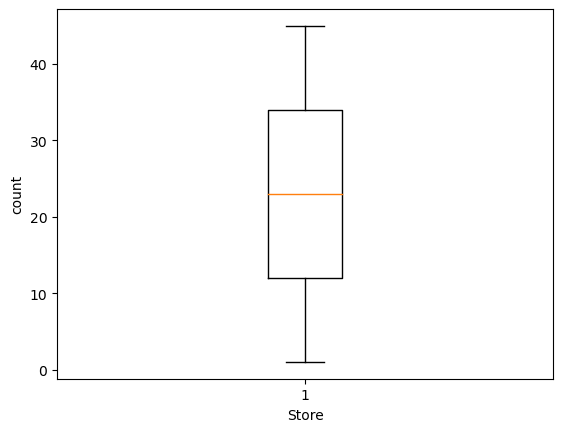

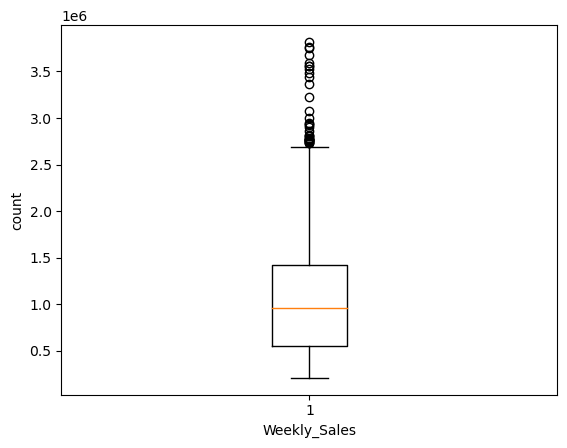

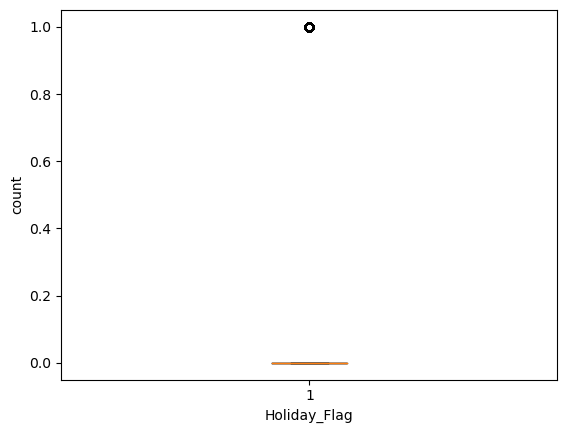

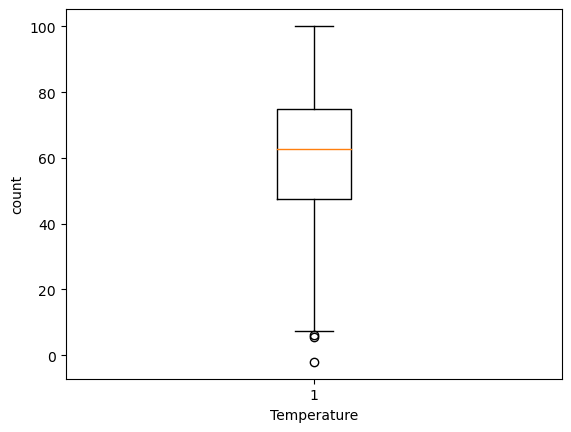

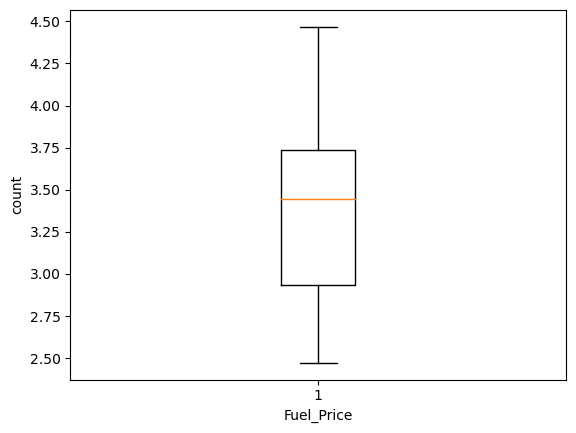

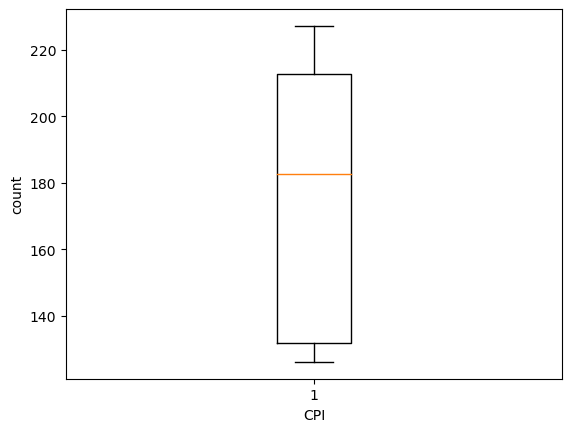

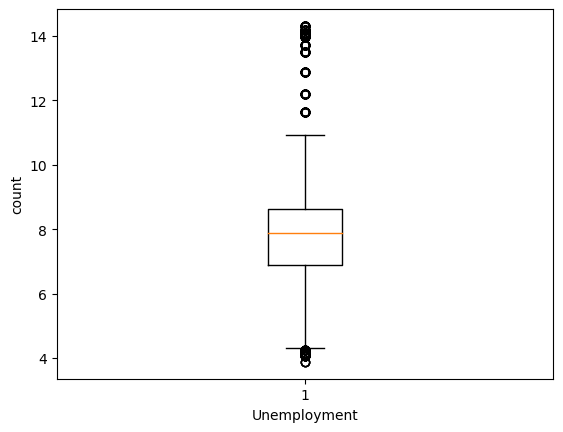

In [11]:
# perform the Outlier detection in Numerical Data..

for col_name in col:
    if(data[col_name].dtypes!='object'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [12]:
# IQR -InterQuartile Range...

out_col=('Weekly_Sales','Temperature','Unemployment')

In [13]:
#Checking holiday Flag for Outliers...

data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [14]:
# Calculate the Outliers by IQR method..
for i in out_col:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LQR=Q1-1.5*IQR
    UQR=Q3+1.5*IQR
    data=data[(data[i]<=UQR)&(data[i]>=LQR)]

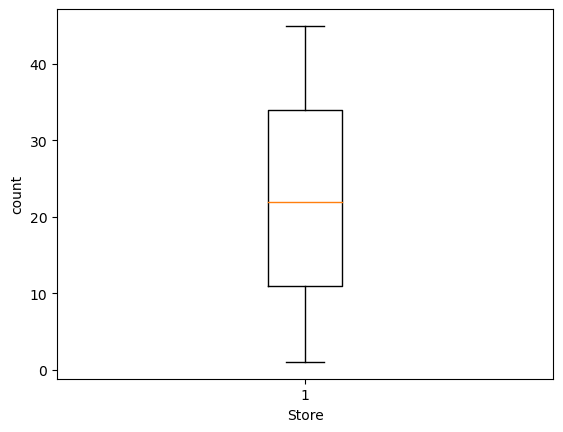

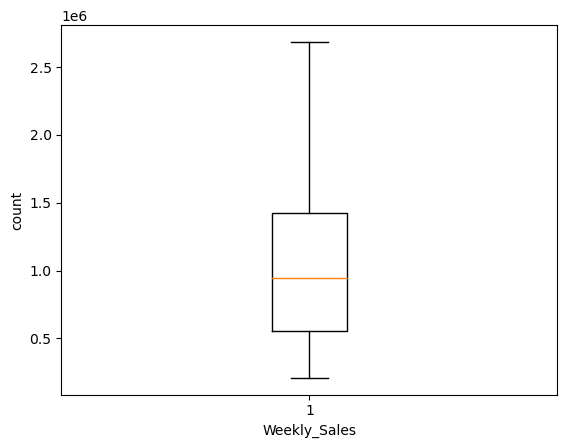

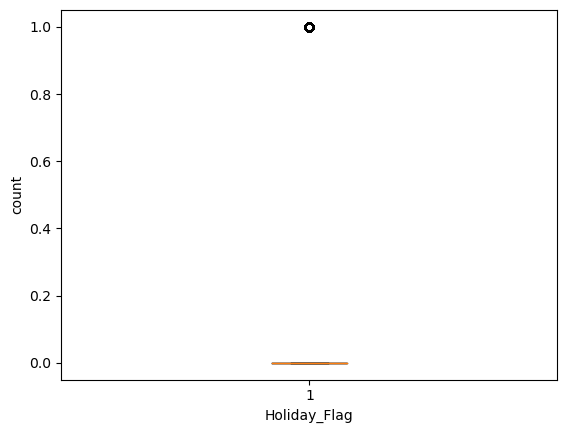

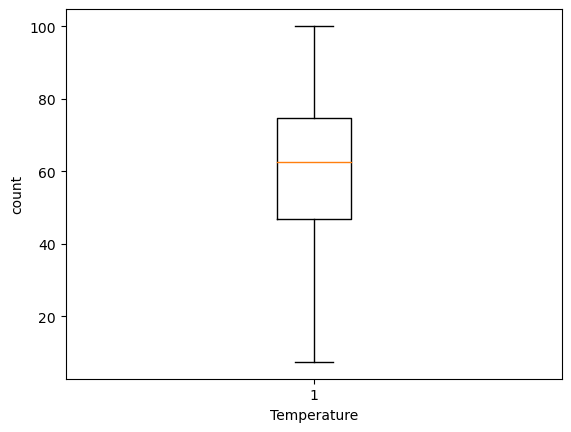

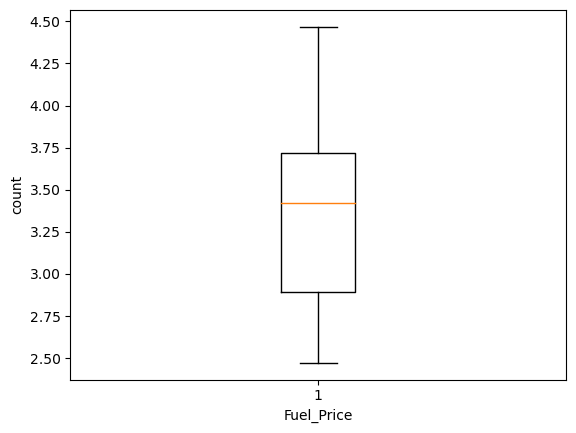

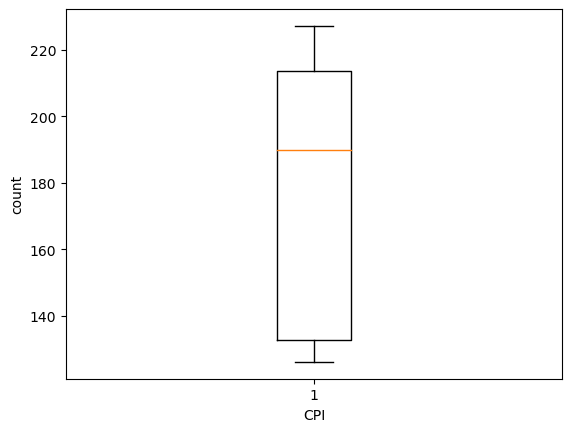

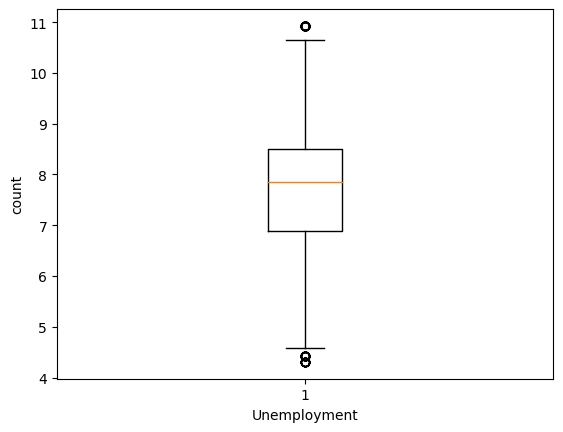

In [15]:
# Recheck the Outliers on performed features...
for col_name in col:
    if(data[col_name].dtypes!='object'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [16]:
# after Outlier Removal we have the below data...
data.head(4)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5917 non-null   int64  
 1   Weekly_Sales  5917 non-null   float64
 2   Holiday_Flag  5917 non-null   int64  
 3   Temperature   5917 non-null   float64
 4   Fuel_Price    5917 non-null   float64
 5   CPI           5917 non-null   float64
 6   Unemployment  5917 non-null   float64
 7   Day           5917 non-null   object 
 8   Month         5917 non-null   object 
 9   year          5917 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 508.5+ KB


In [18]:
# Data Distribution in Categorica & Numerical 

col=data.columns
col

categorical_feature=[]
numerical_feature=[]

for col_name in col:
    if data[col_name].dtypes=='object':
        categorical_feature.append(col_name)
    else:
        numerical_feature.append(col_name)
print(categorical_feature)
print(numerical_feature)

['Day', 'Month', 'year']
['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [19]:
# Checking the basis Statistic on data..

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,22.801251,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
std,13.094060,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,22.000000,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,34.000000,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


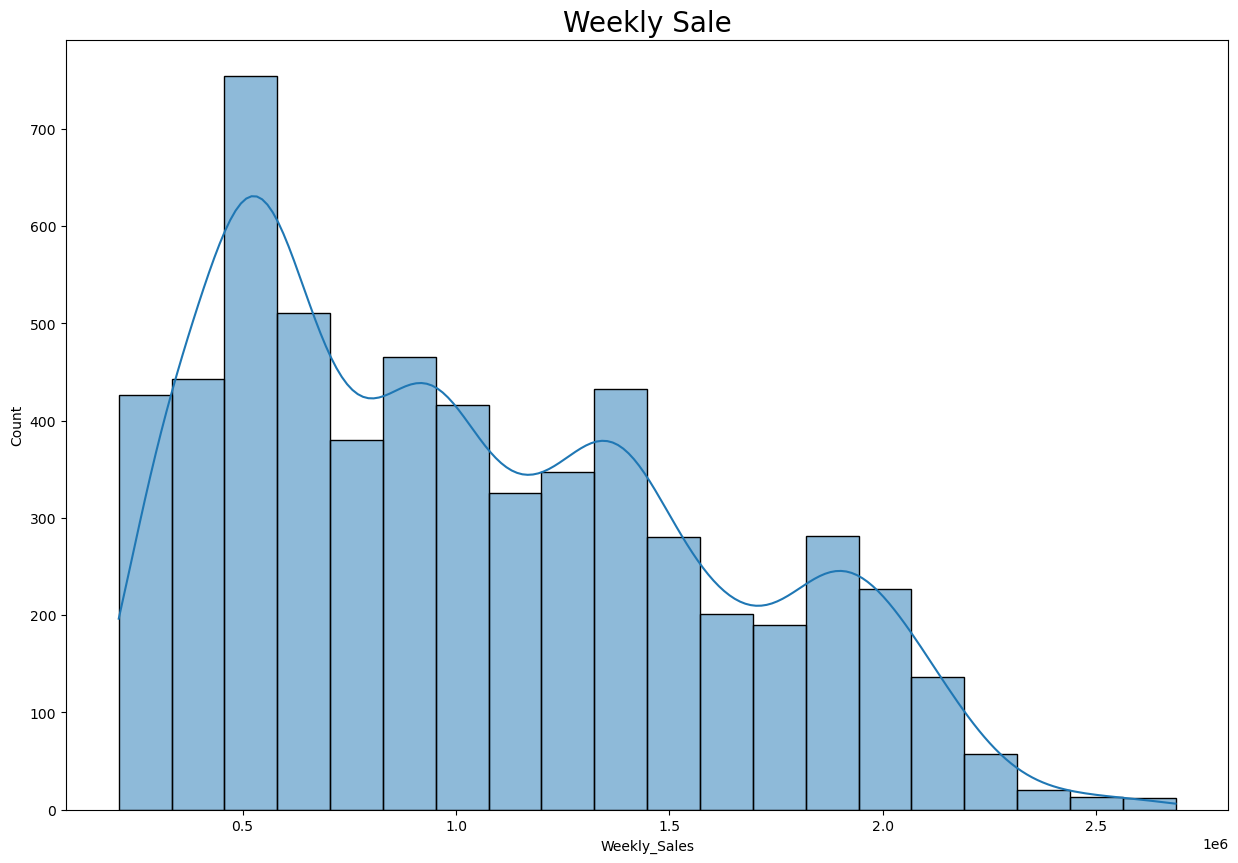

In [20]:
#Plotting on Weeklkly Sales
plt.figure(figsize=(15,10))
ax=sns.histplot(data['Weekly_Sales'],kde=True,bins=20)
plt.title('Weekly Sale',fontsize=20)
plt.show()

# in above graph shows that our weekly sales is not normally distributed, its skewed to right

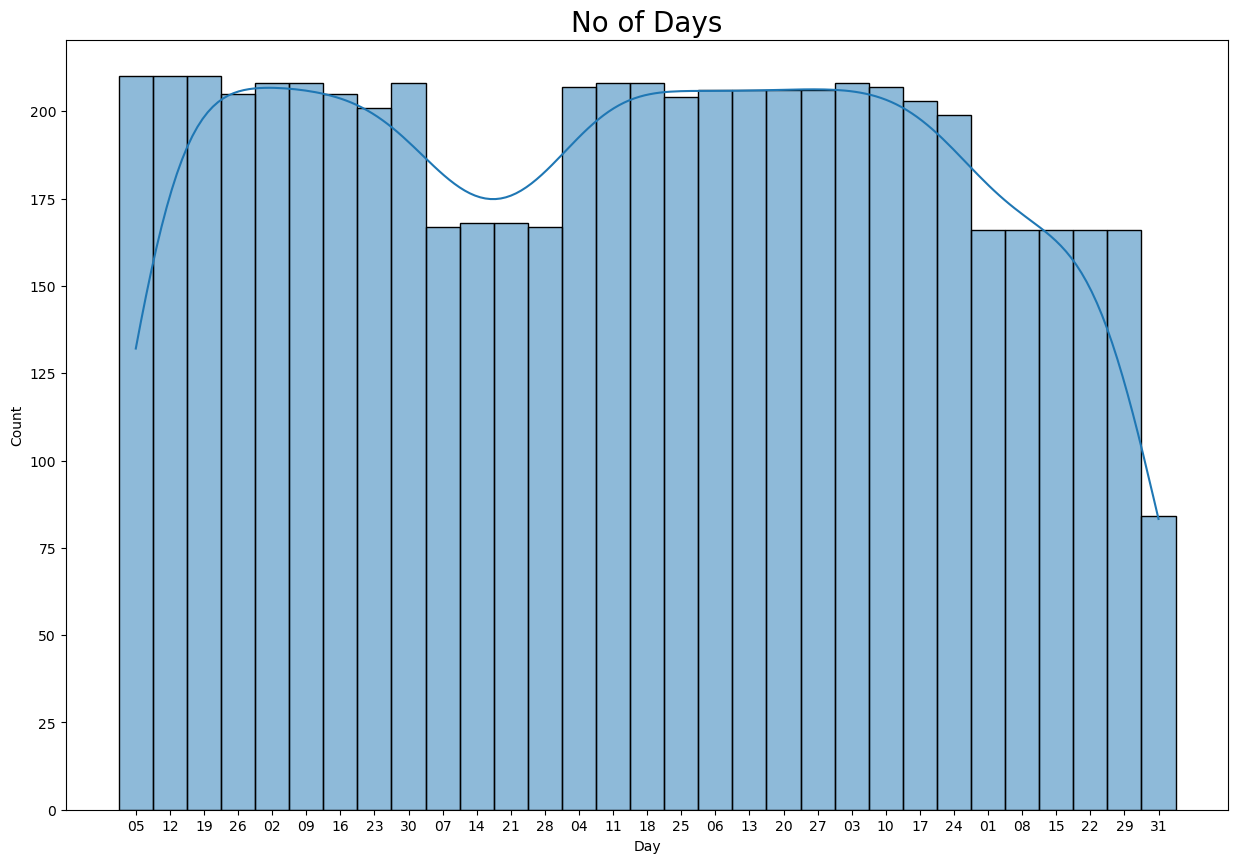

In [21]:
# Ploting on Caterogical Data..

# Day wise sales

plt.figure(figsize=(15,10))
ax=sns.histplot(data['Day'],kde=True,bins=20)
plt.title('No of Days',fontsize=20)
plt.show()


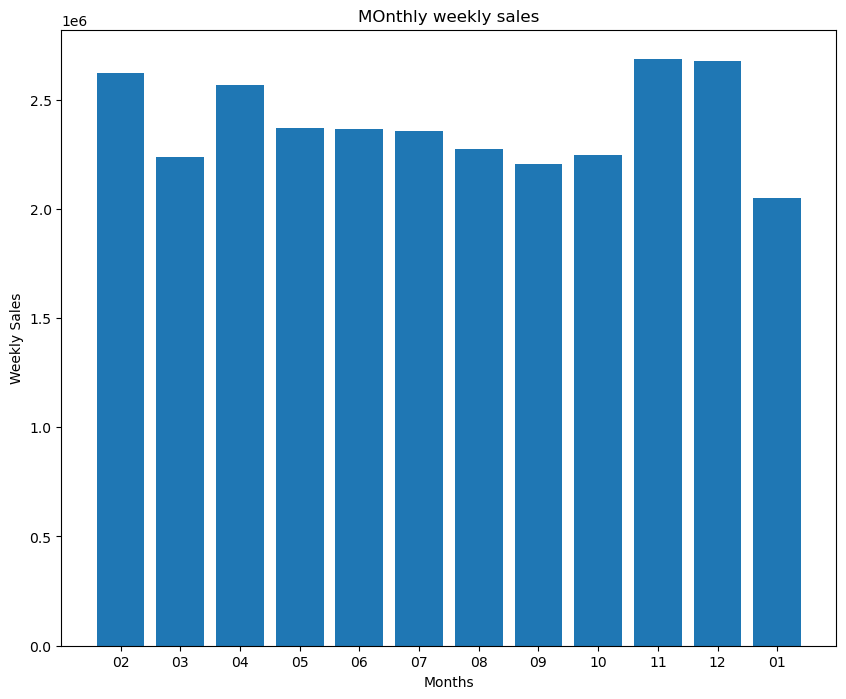

In [22]:
# MOnth Wise Sale

plt.figure(figsize=(10,8))
plt.bar(data['Month'],data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('MOnthly weekly sales')
plt.show()

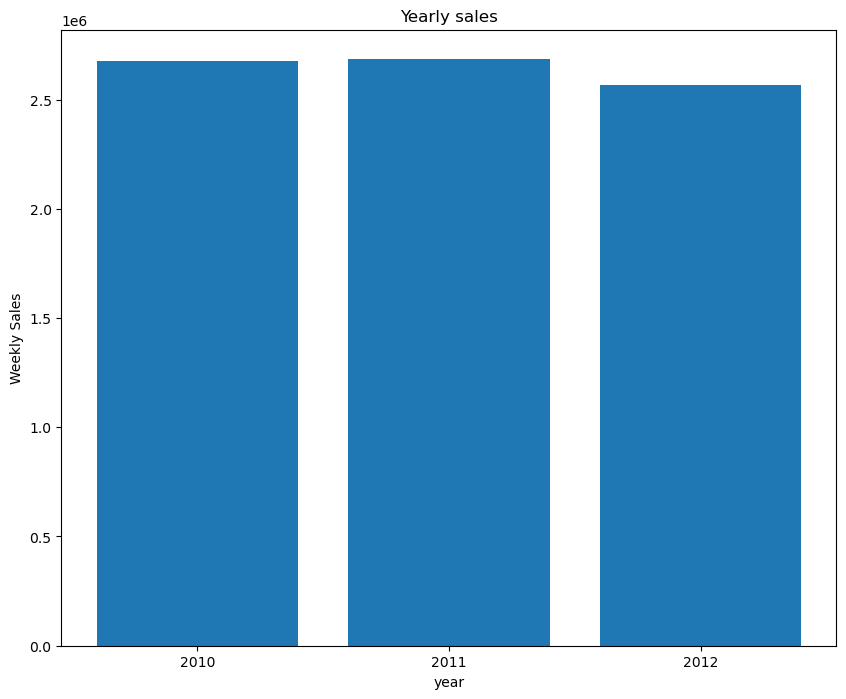

In [23]:
# Yearly sale


plt.figure(figsize=(10,8))
plt.bar(data['year'],data['Weekly_Sales'])
plt.xlabel('year')
plt.ylabel('Weekly Sales')
plt.title('Yearly sales')
plt.show()

In [24]:
# Per above plot we can see in year 2011 walmart store has more thansactions other than year 2010 & 2012

C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


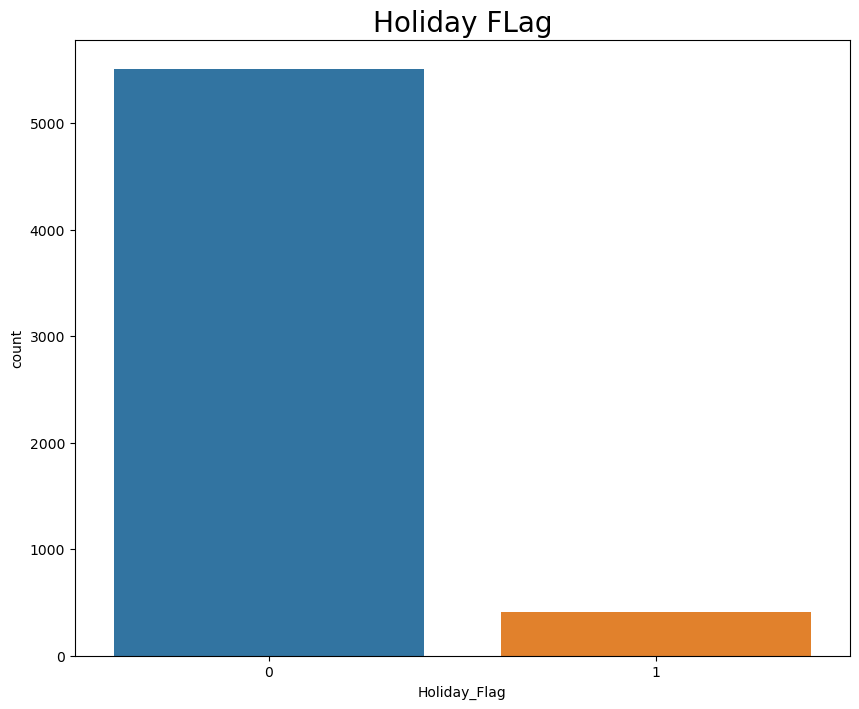

In [25]:
# Plotting on Numerical Data....

# Holiday Flag

plt.figure(figsize=(10,8))
ax=sns.countplot(data['Holiday_Flag'],)
plt.title('Holiday FLag',fontsize=20)
plt.show()

# as per above graph we consider that 0 for no holiday and 1 is for holday. People wants to go more in non holidays

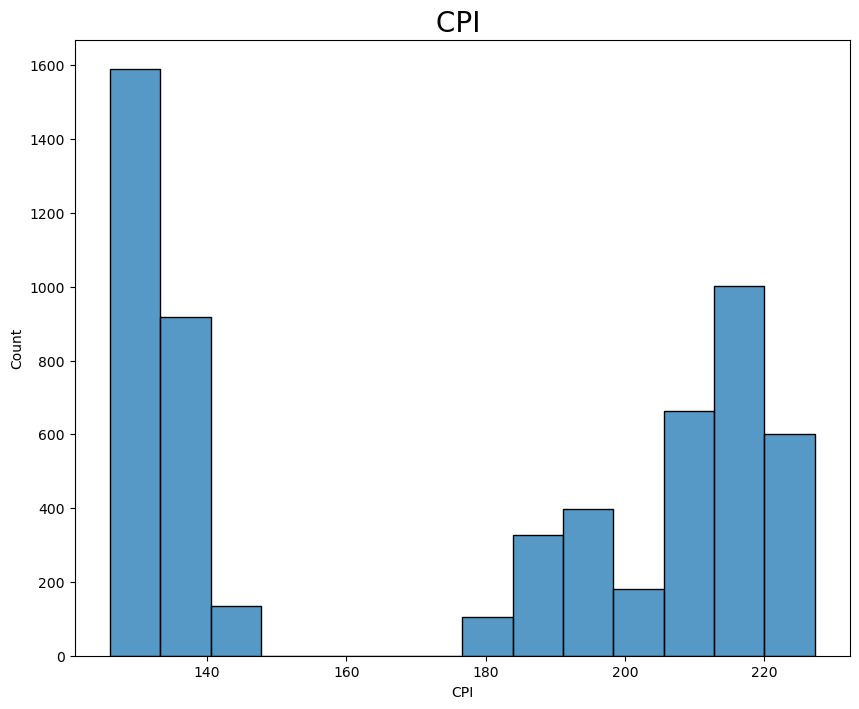

In [26]:
# CPI plotting...

plt.figure(figsize=(10,8))
ax=sns.histplot(data['CPI'],)
plt.title('CPI ',fontsize=20)
plt.show()

In [27]:

# in above plot people have 0 t0 120 have more CPI 

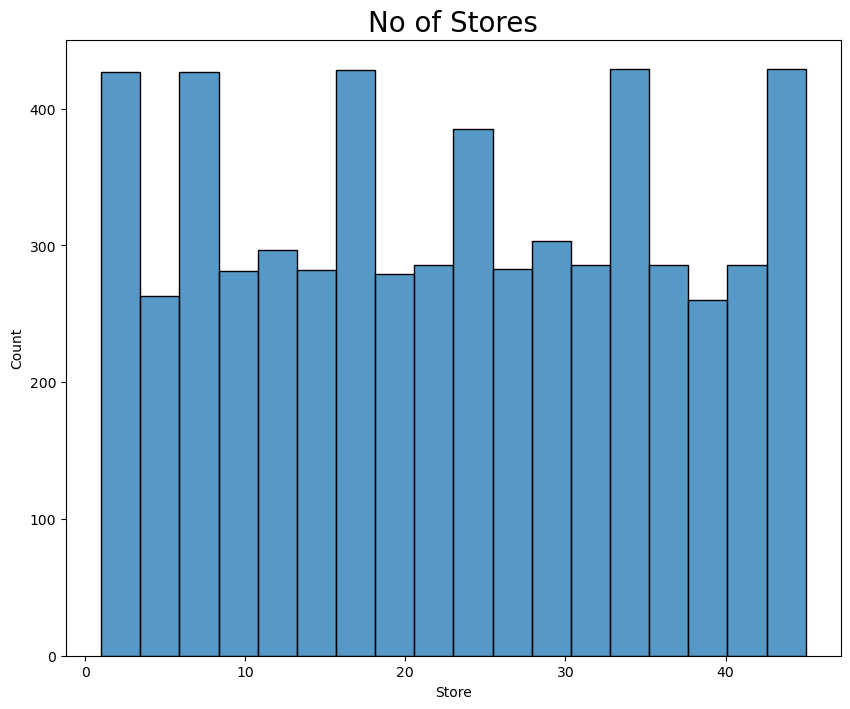

In [28]:
# Store plotting...
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Store'])
plt.title('No of Stores',fontsize=20,)
plt.show()

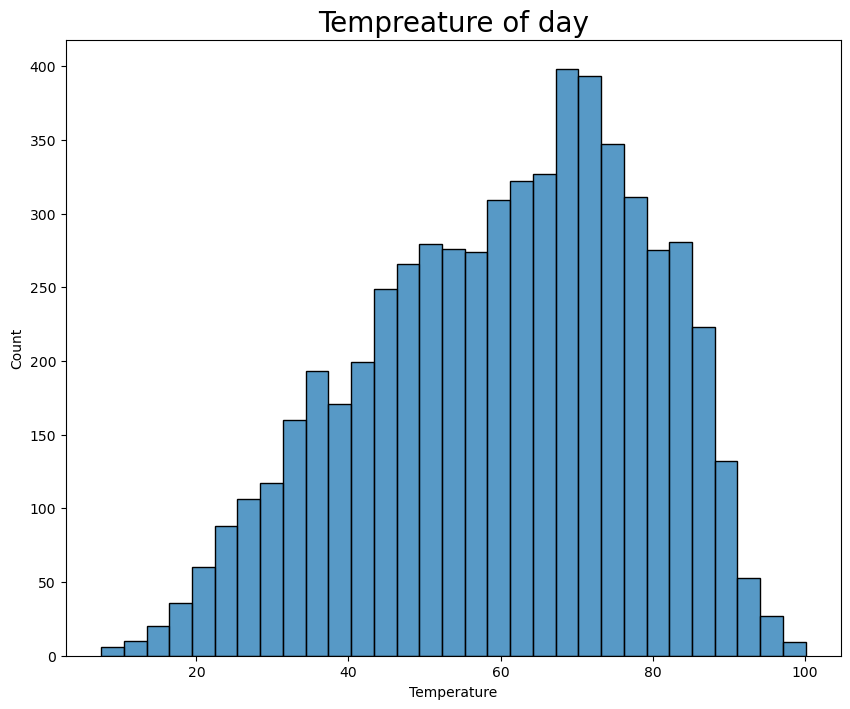

In [29]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Temperature'])
plt.title('Tempreature of day',fontsize=20,)
plt.show()

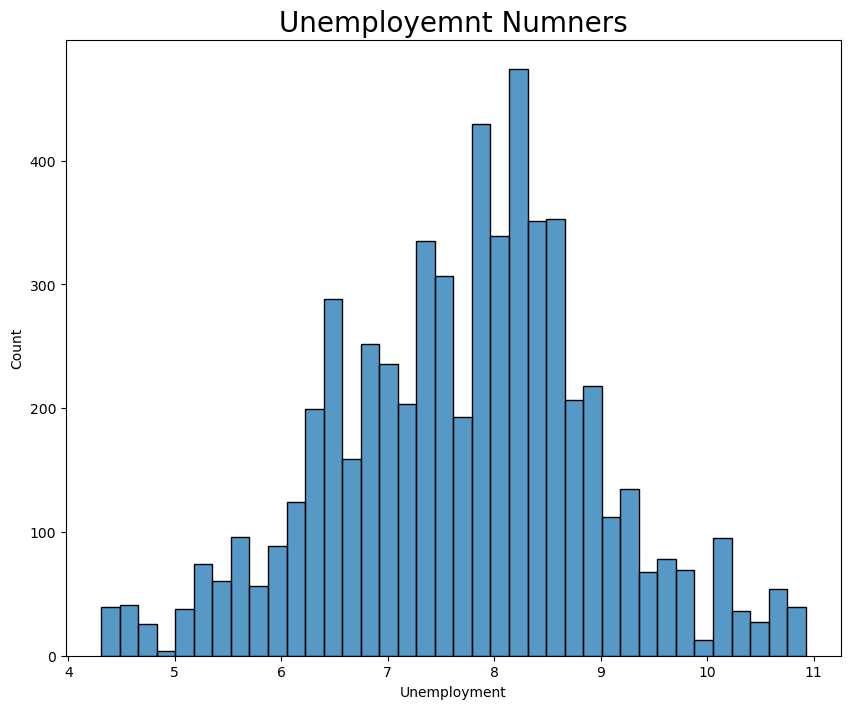

In [30]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Unemployment'])
plt.title('Unemployemnt Numners',fontsize=20,)
plt.show()

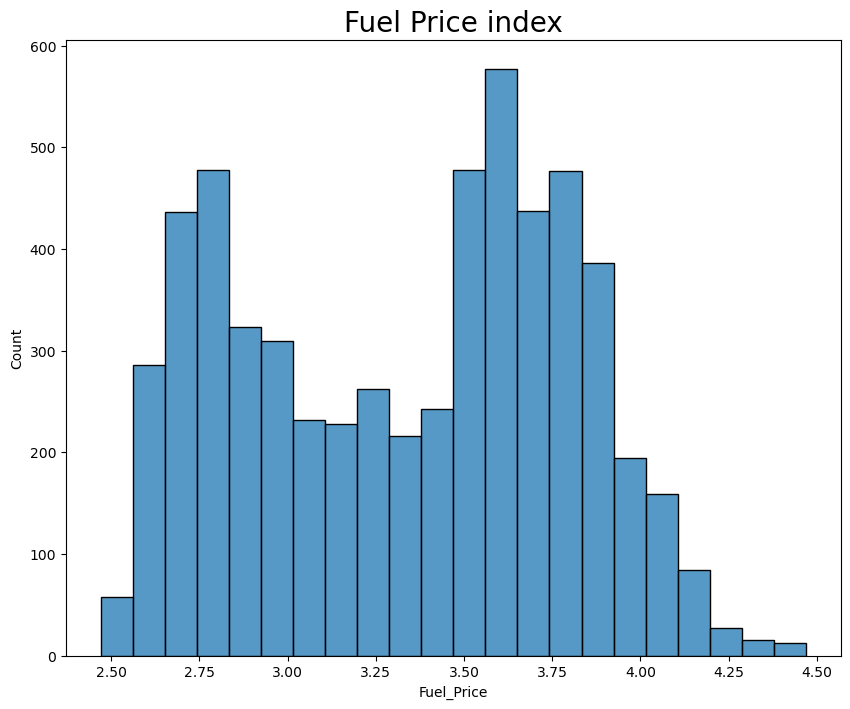

In [31]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Fuel_Price'])
plt.title('Fuel Price index',fontsize=20,)
plt.show()

In [32]:
# Overall Correlation with numerical data
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


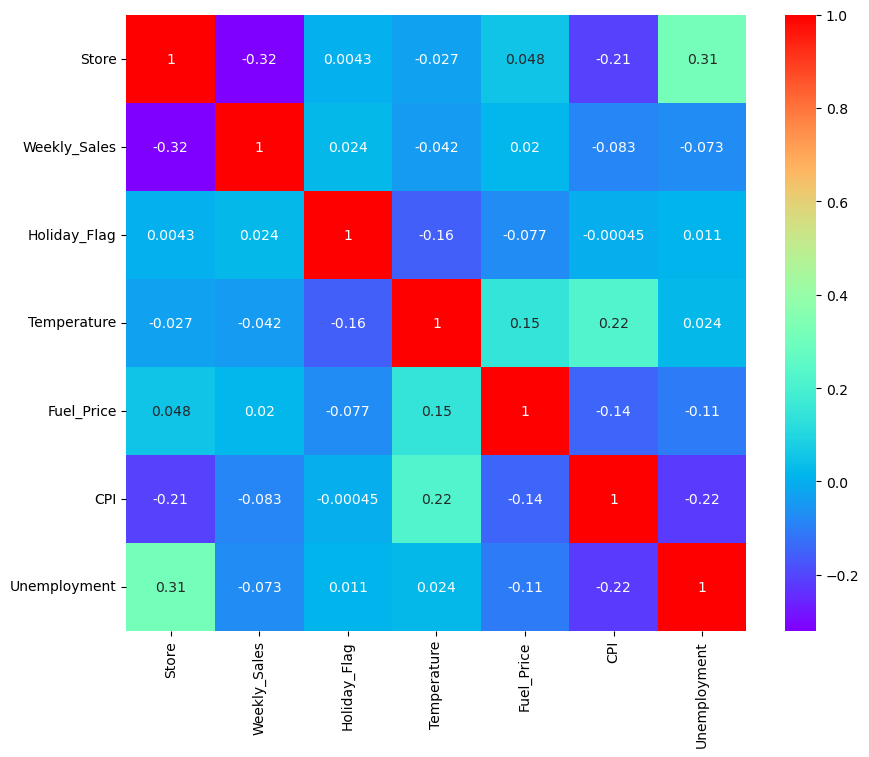

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

In [34]:
# As per above graph we can find that CPI & Unemployment has lest correlation with each others

In [35]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010


#a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#are suffering the most?

In [36]:
total_sale=data.groupby('Weekly_Sales')['Unemployment','Store'].sum().reset_index()
total_sale

C:\Users\DHEERU\AppData\Local\Temp\ipykernel_16168\4086344657.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_sale=data.groupby('Weekly_Sales')['Unemployment','Store'].sum().reset_index()


,Weekly_Sales,Unemployment,Store
0,209986.25,9.265,33
1,213538.32,9.265,33
2,215359.21,8.010,33
3,219804.85,9.265,33
4,220060.35,8.010,33
...,...,...,...
5912,2627910.75,8.021,27
5913,2644633.02,6.551,6
5914,2658725.29,8.163,2
5915,2678206.42,8.067,19


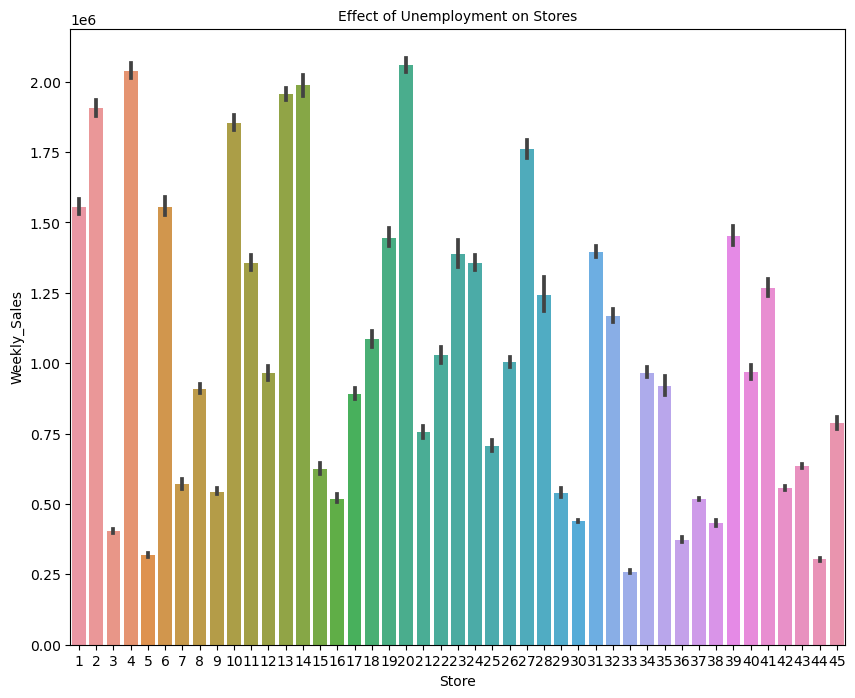

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x='Store',y='Weekly_Sales',data=total_sale)
plt.xlabel('Store',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Unemployment on Stores',fontsize=10)
plt.show()

# AS per above graph the Store # 33 is most afected store from unemployment....

b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [122]:
dt=pd.read_csv('Walmart.xls')
dt.head(2)

dt=dt.iloc[:,:3]
dt

dt.index=dt['Date']
dt.head()

,Store,Date,Weekly_Sales
Date,,,
05-02-2010,1,05-02-2010,1643690.90
12-02-2010,1,12-02-2010,1641957.44
19-02-2010,1,19-02-2010,1611968.17
26-02-2010,1,26-02-2010,1409727.59
05-03-2010,1,05-03-2010,1554806.68


<AxesSubplot:xlabel='Date'>

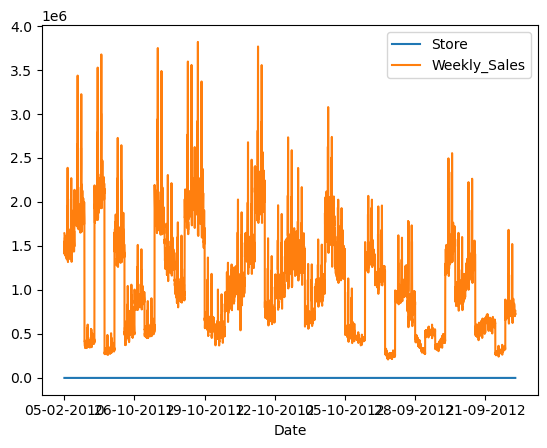

In [123]:
dt.plot()


In [41]:
# as per above graph data is looks Seasonaltrend 

c. Does temperature affect the weekly sales in any manner?


In [43]:
total_sale=data.groupby('Weekly_Sales')['Temperature','Store','Day'].mean().reset_index()
total_sale

C:\Users\DHEERU\AppData\Local\Temp\ipykernel_16168\1167220100.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_sale=data.groupby('Weekly_Sales')['Temperature','Store','Day'].mean().reset_index()


,Weekly_Sales,Temperature,Store
0,209986.25,52.82,33.0
1,213538.32,71.34,33.0
2,215359.21,51.60,33.0
3,219804.85,52.91,33.0
4,220060.35,59.12,33.0
...,...,...,...
5912,2627910.75,46.67,27.0
5913,2644633.02,49.45,6.0
5914,2658725.29,62.98,2.0
5915,2678206.42,26.05,19.0


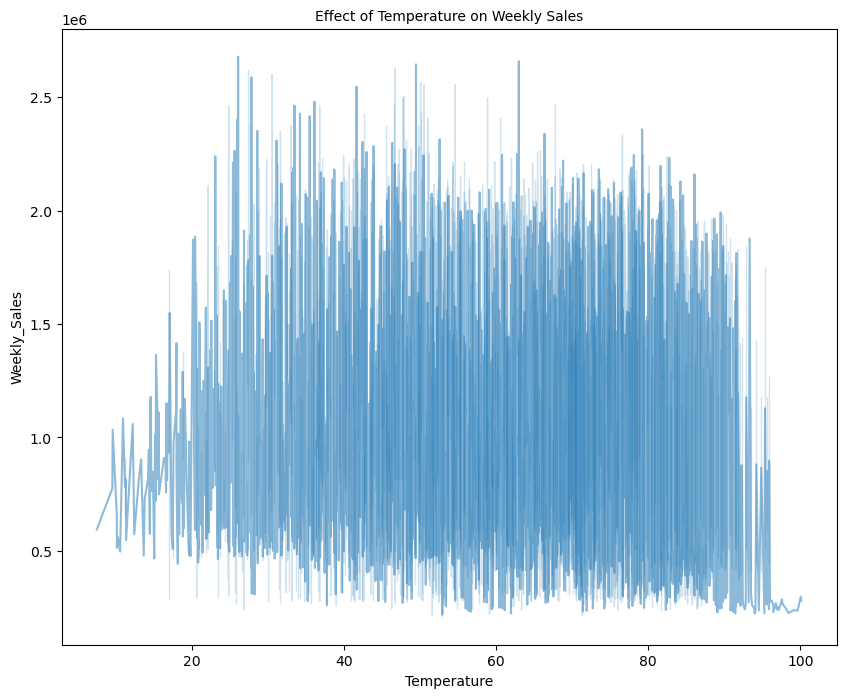

In [97]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Temperature',y='Weekly_Sales',data=data,alpha=0.5)
plt.xlabel('Temperature',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Temperature on Weekly Sales',fontsize=10)
plt.show()

# AS per above graph we can see there not much impect of Tempreature on Weekly Sales...

d. How is the Consumer Price index affecting the weekly sales of various stores?

In [45]:
Store_Avg=data.groupby('Store')['CPI','Weekly_Sales'].mean().reset_index()
total_sale

C:\Users\DHEERU\AppData\Local\Temp\ipykernel_16168\3227115750.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Store_Avg=data.groupby('Store')['CPI','Weekly_Sales'].mean().reset_index()


,Weekly_Sales,Temperature,Store
0,209986.25,52.82,33.0
1,213538.32,71.34,33.0
2,215359.21,51.60,33.0
3,219804.85,52.91,33.0
4,220060.35,59.12,33.0
...,...,...,...
5912,2627910.75,46.67,27.0
5913,2644633.02,49.45,6.0
5914,2658725.29,62.98,2.0
5915,2678206.42,26.05,19.0


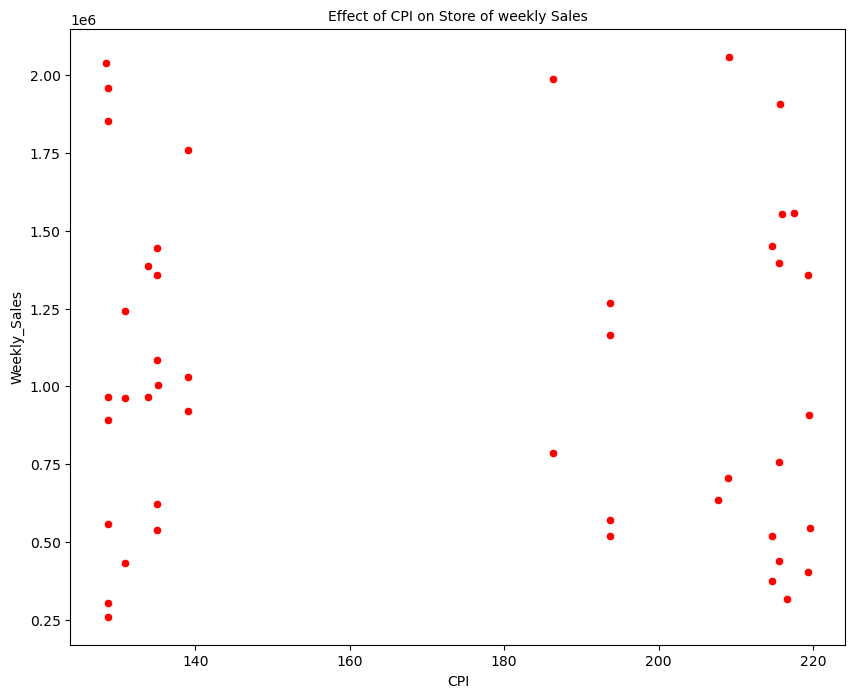

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=Store_Avg,color='red')
plt.xlabel('CPI',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of CPI on Store of weekly Sales',fontsize=10)
plt.show()

In [47]:
# Aper per above scatter graph thr relationship b/w Sore and CPI...

e. Top performing stores according to the historical data.


<AxesSubplot:title={'center':'Total Sale for top performing store'}, xlabel='Store', ylabel='Weekly_Sales'>

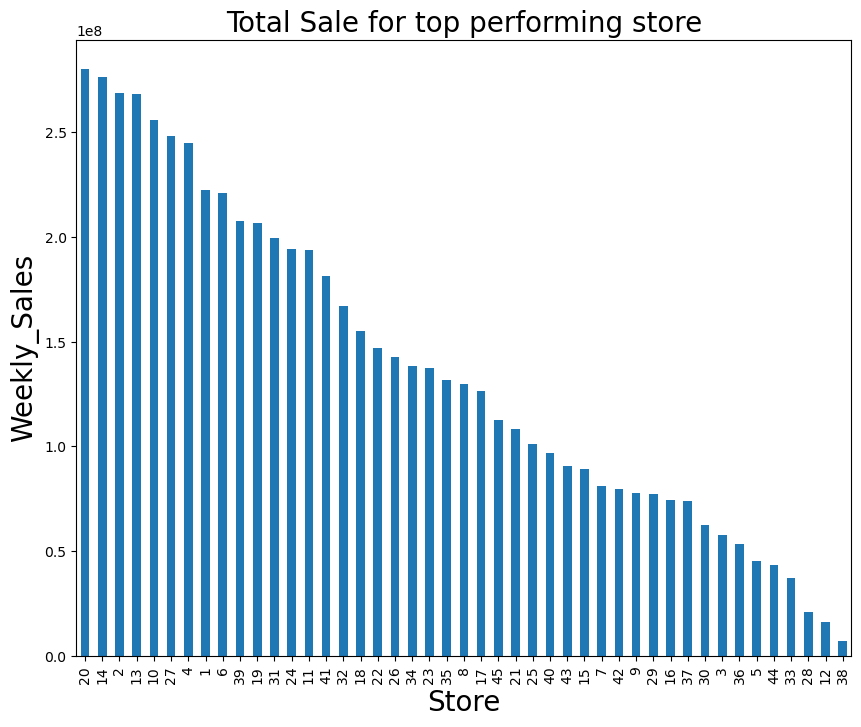

In [93]:
import numpy as np
t_sale=data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
t_sale_array=np.array(t_sale)
plt.figure(figsize=(10,8))
plt.xticks(rotation=0)
plt.title('Total Sale for top performing store',fontsize=20)
plt.xlabel('Store',fontsize=20)
plt.ylabel('Weekly_Sales',fontsize=20)
t_sale.plot(kind='bar')

# As per above graph the top performing Store is Store#20

In [49]:
store_sale=data.groupby('Store')['Weekly_Sales'].sum()
# Sort the store values
store_sale=store_sale.sort_values(ascending=False)

print("Top Performing Store:")

print("*********")
print(store_sale.head())

Top Performing Store:
*********
Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64


f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


In [50]:
store_sale=data.groupby('Store')['Weekly_Sales'].sum()


In [51]:
worst_performing_sotre=store_sale.idxmin()
print(f"worst performing Store:{worst_performing_sotre}")
best_performing_sotre=store_sale.idxmax()
print(f"Best performing Store:{best_performing_sotre}")
Store_diff=store_sale.idxmax()-store_sale.idxmin()
print(f"Different Stores:{Store_diff}")


worst performing Store:38
Best performing Store:20
Different Stores:-18


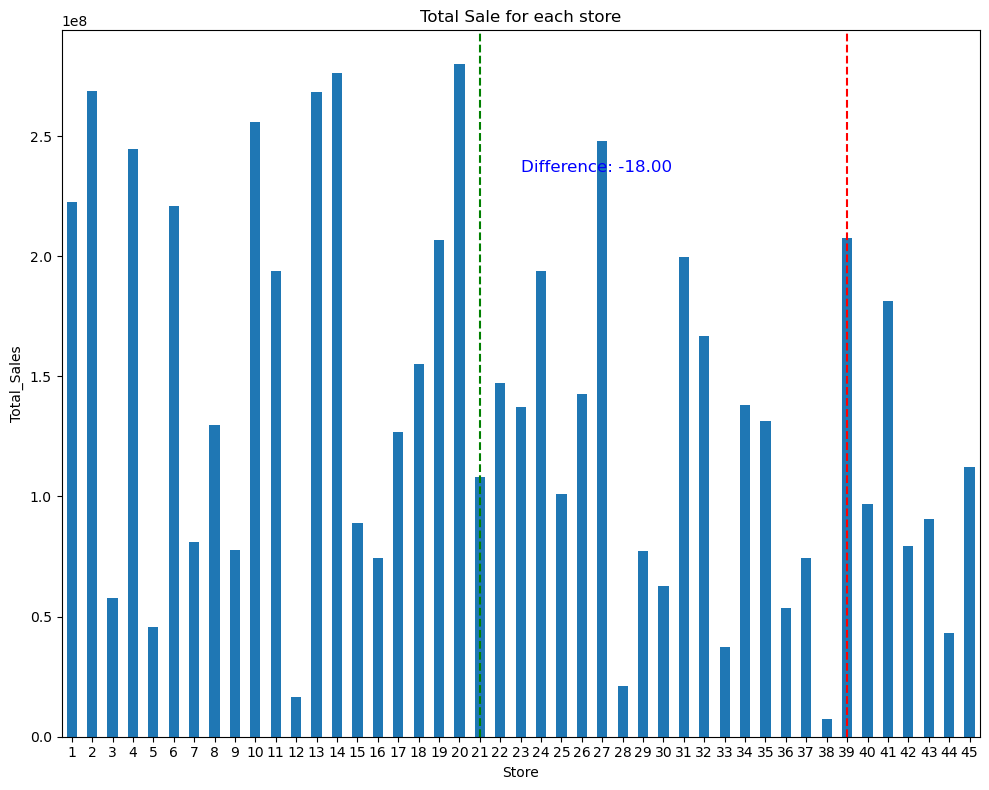

In [88]:
plt.figure(figsize=(10,8))
store_sale.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Total_Sales')
plt.title('Total Sale for each store')
plt.xticks(rotation=0)

plt.axvline(x=worst_performing_sotre,color='red',linestyle='--',label=worst_performing_sotre)
plt.axvline(x=best_performing_sotre,color='green',linestyle='--',label=best_performing_sotre)
plt.annotate(f'Difference: {Store_diff:.2f}', xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
plt.tight_layout()
plt.show()

# MOdeling...

In [52]:
#importing Important Libraieies

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [53]:
#Data Spliting...

y=data.iloc[:,1:2]  #Independent Variables
x=data.iloc[:,0&1:] #Target Variables


In [54]:
x=x.drop(['Weekly_Sales'],axis=1)

In [55]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,0,56.47,3.969,192.330854,8.667,19,10,2012


In [56]:
y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [57]:
#Date Spliting into Train and Test...

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4733, 9)
(1184, 9)
(4733, 1)
(1184, 1)


In [59]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

* Linear Regression*

Train Accuracy Score: 0.12921268341860803
Test Accuracy Score: 0.13666651359514315
MSE: 272324097069.2207
MAE: 434866.6862946202
RMSE: 521846.81379617593


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

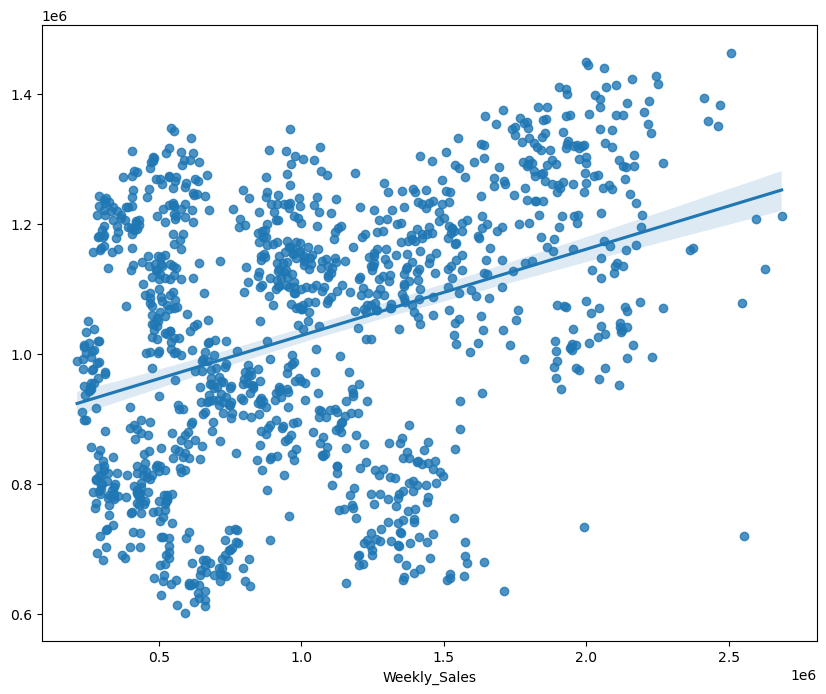

In [60]:
# Linera Regression:


lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print('* Linear Regression*\n')

print('Train Accuracy Score:', lr.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,lr_pred))

print('MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

plt.figure(figsize=(10,8))
sns.regplot(y_test,y=lr_pred)

C:\Users\DHEERU\AppData\Local\Temp\ipykernel_16168\3312763846.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdf.fit(x_train,y_train)


* Random Forest Regressor*

Train Accuracy Score: 0.9949529092263274
Test Accuracy Score: 0.2514213408555305
MSE: 236126607674.76373
MAE: 268769.3698206081
RMSE: 485928.60347458837


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

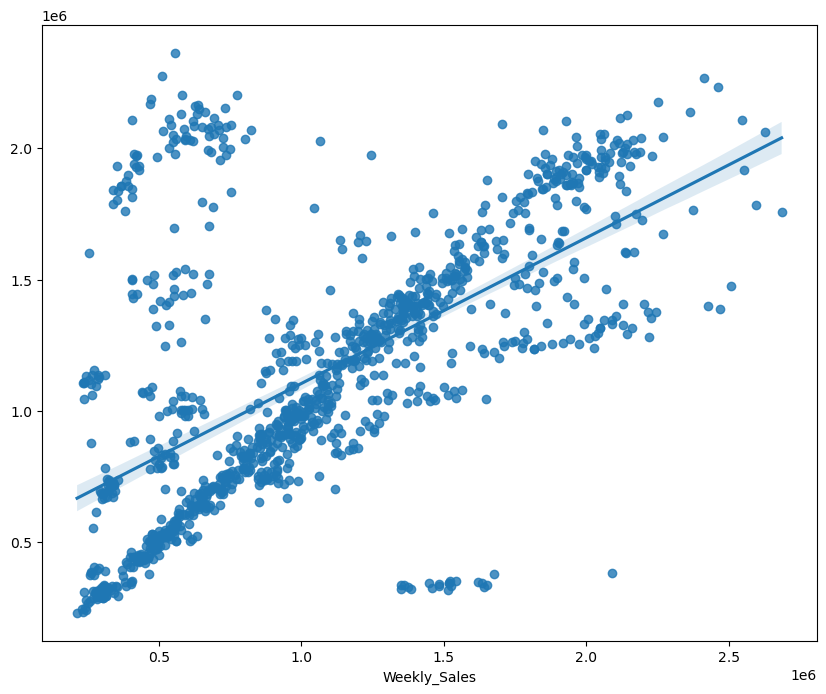

In [61]:
# Random Forest


rdf=RandomForestRegressor()
rdf.fit(x_train,y_train)
rdf_pred=rdf.predict(x_test)

print('* Random Forest Regressor*\n')

print('Train Accuracy Score:', rdf.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,rdf_pred))

print('MSE:',metrics.mean_squared_error(y_test,rdf_pred))
print('MAE:',metrics.mean_absolute_error(y_test,rdf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rdf_pred)))

plt.figure(figsize=(10,8))
sns.regplot(y_test,y=rdf_pred)

* Decision Tree Regressor*

Train Accuracy Score: 1.0
Test Accuracy Score: 0.13511517014601604
MSE: 272813442392.52914
MAE: 289538.9195016892
RMSE: 522315.462524832


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

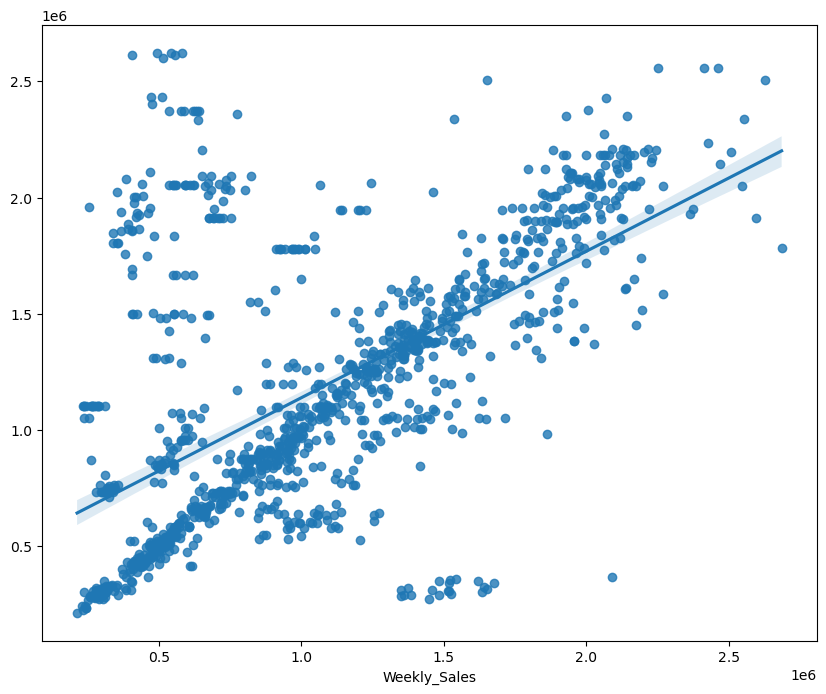

In [62]:
# Decision Tree


dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

print('* Decision Tree Regressor*\n')

print('Train Accuracy Score:', dt.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,dt_pred))

print('MSE:',metrics.mean_squared_error(y_test,dt_pred))
print('MAE:',metrics.mean_absolute_error(y_test,dt_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

plt.figure(figsize=(10,8))
sns.regplot(y_test,y=dt_pred)

* KNearest Neighbors Regressor*

Train Accuracy Score: 1.0
Test Accuracy Score: 0.23194411020582129
MSE: 242270374056.60388
MAE: 274558.9238175676
RMSE: 492209.6850495771


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

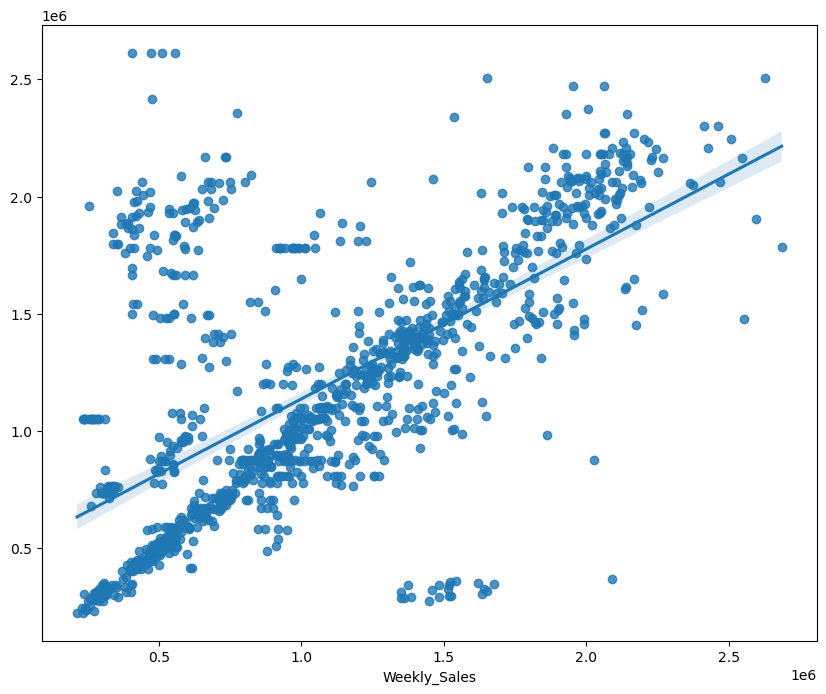

In [63]:
#KNearest Neighbors


knn=DecisionTreeRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

print('* KNearest Neighbors Regressor*\n')

print('Train Accuracy Score:', knn.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,knn_pred))

print('MSE:',metrics.mean_squared_error(y_test,knn_pred))
print('MAE:',metrics.mean_absolute_error(y_test,knn_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,knn_pred)))

plt.figure(figsize=(10,8))
sns.regplot(y_test,y=knn_pred)


In [64]:
# Cross Validation...

# Linear Regression CV:

lr_scores=cross_val_score(lr,x_train,y_train,cv=10,scoring='r2')
print(lr_scores)
print('LinearRegression_Mean Score:',lr_scores.mean())


# Random Forest CV:

rdf_scores=cross_val_score(rdf,x_train,y_train,cv=10,scoring='r2')
print(rdf_scores)
print('RandomForest_Mean Score:',rdf_scores.mean())


# Decision Tree CV:

dt_scores=cross_val_score(dt,x_train,y_train,cv=10,scoring='r2')
print(dt_scores)
print('Decison_Mean Score:',dt_scores.mean())



# Knearest Neighbors CV:

knn_scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='r2')
print(knn_scores)
print('Knn_Mean Score:',knn_scores.mean())


[0.13914735 0.13694998 0.10282754 0.12545706 0.08936086 0.13831518
 0.18760952 0.12384174 0.09625674 0.09252671]
LinearRegression_Mean Score: 0.12322926742153477


C:\Users\DHEERU\anaconda3 D\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column

[0.97794248 0.96529522 0.95807901 0.96137423 0.94892263 0.97129735
 0.97651167 0.95121447 0.95906167 0.94981154]
RandomForest_Mean Score: 0.9619510280727432
[0.95785683 0.94732353 0.93836256 0.91826555 0.93142377 0.95619266
 0.95699678 0.93067622 0.94336672 0.93380056]
Decison_Mean Score: 0.9414265172214668
[0.95908417 0.94764469 0.93933877 0.92567649 0.92900853 0.95783114
 0.95929432 0.9310353  0.94119045 0.93474263]
Knn_Mean Score: 0.942484648522451


In [65]:
# Combines Score display...

print('LinearReg_Train Accuracy Score:', lr.score(x_train,y_train))
print('LinearRef_Test Accuracy Score:', r2_score(y_test,lr_pred))
print('LinearRegression_Mean Score:',lr_scores.mean())

print('************\n')

print('RandomForest_Train Accuracy Score:', rdf.score(x_train,y_train))
print('RandomForest_Test Accuracy Score:', r2_score(y_test,rdf_pred))
print('RandomForest_Mean Score:',rdf_scores.mean())

print('************\n')
print('DecisonTree_Train Accuracy Score:', dt.score(x_train,y_train))
print('DecisionTree_Test Accuracy Score:', r2_score(y_test,dt_pred))
print('Decison_Mean Score:',dt_scores.mean())



print('************\n')
print('knn_Train Accuracy Score:', knn.score(x_train,y_train))
print('Knn_Test Accuracy Score:', r2_score(y_test,knn_pred))
print('Knn_Mean Score:',knn_scores.mean())



LinearReg_Train Accuracy Score: 0.12921268341860803
LinearRef_Test Accuracy Score: 0.13666651359514315
LinearRegression_Mean Score: 0.12322926742153477
************

RandomForest_Train Accuracy Score: 0.9949529092263274
RandomForest_Test Accuracy Score: 0.2514213408555305
RandomForest_Mean Score: 0.9619510280727432
************

DecisonTree_Train Accuracy Score: 1.0
DecisionTree_Test Accuracy Score: 0.13511517014601604
Decison_Mean Score: 0.9414265172214668
************

knn_Train Accuracy Score: 1.0
Knn_Test Accuracy Score: 0.23194411020582129
Knn_Mean Score: 0.942484648522451


# As per above score RandomForest model is giving the higest score of 96% which is better than other models...

# MOdel Forcasting By Prophet Library...

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks

In [66]:
#For forcasting we are using the Prophet Library...

!pip install prophet

In [67]:
from prophet import Prophet

In [68]:
import os
os

<module 'os' from 'C:\\Users\\DHEERU\\anaconda3 D\\lib\\os.py'>

In [69]:
dt=pd.read_csv('Walmart.xls',parse_dates=['Date'])

C:\Users\DHEERU\anaconda3 D\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide form

In [70]:
dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [71]:
Max_Sale=dt['Weekly_Sales'].max()
Max_Sale

3818686.45

In [72]:
Min_Sale=dt['Weekly_Sales'].min()
Min_Sale

209986.25

In [73]:
total_sale=dt.groupby('Date')['Weekly_Sales',].sum().reset_index()

In [74]:
total_sale

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [75]:
#In prohpet we need to give only 2 columns for forcasting..
total_sale.columns=['ds','y']
total_sale['ds']=pd.to_datetime(total_sale['ds'])

In [76]:
total_sale

,ds,y
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [77]:
model=Prophet(interval_width=0.95) #Level of confidendce
model.fit(total_sale)
future=model.make_future_dataframe(periods=12)
future.tail(12)

20:22:55 - cmdstanpy - INFO - Chain [1] start processing
20:23:07 - cmdstanpy - INFO - Chain [1] done processing


,ds
143,2012-12-11
144,2012-12-12
145,2012-12-13
146,2012-12-14
147,2012-12-15
148,2012-12-16
149,2012-12-17
150,2012-12-18
151,2012-12-19
152,2012-12-20


In [78]:
forcast=model.predict(future)
forcast.tail(12)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
150,2012-12-18,6.217271e+07,5.465858e+07,7.037181e+07
151,2012-12-19,6.033514e+07,5.250149e+07,6.831583e+07
152,2012-12-20,6.166926e+07,5.354453e+07,6.964564e+07
153,2012-12-21,6.166833e+07,5.384818e+07,7.012055e+07
154,2012-12-22,6.004287e+07,5.182468e+07,6.810382e+07


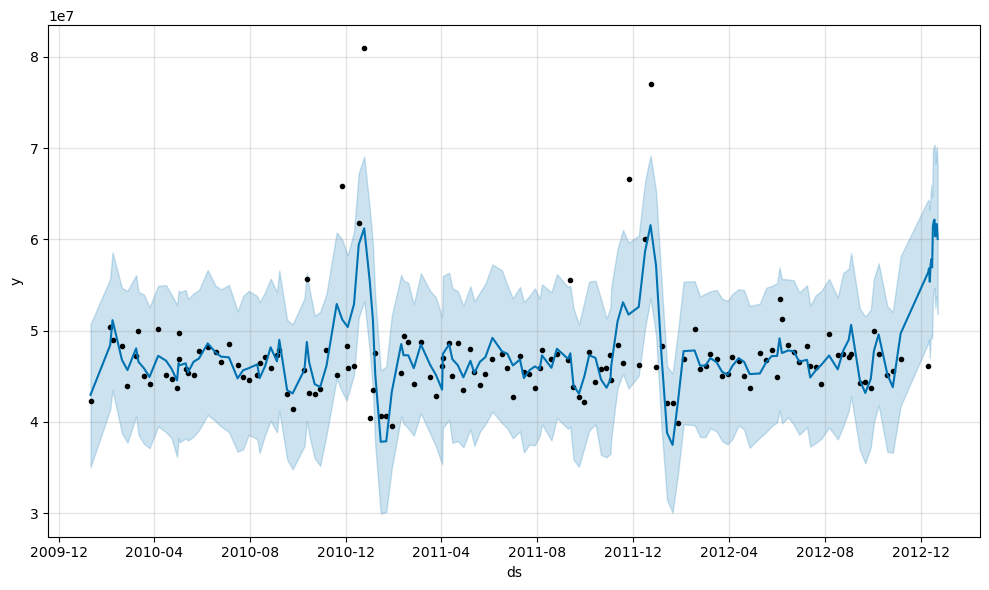

In [79]:
total_sale_plot=model.plot(forcast)

The above graph is showing the future predicted values for 12 weeks

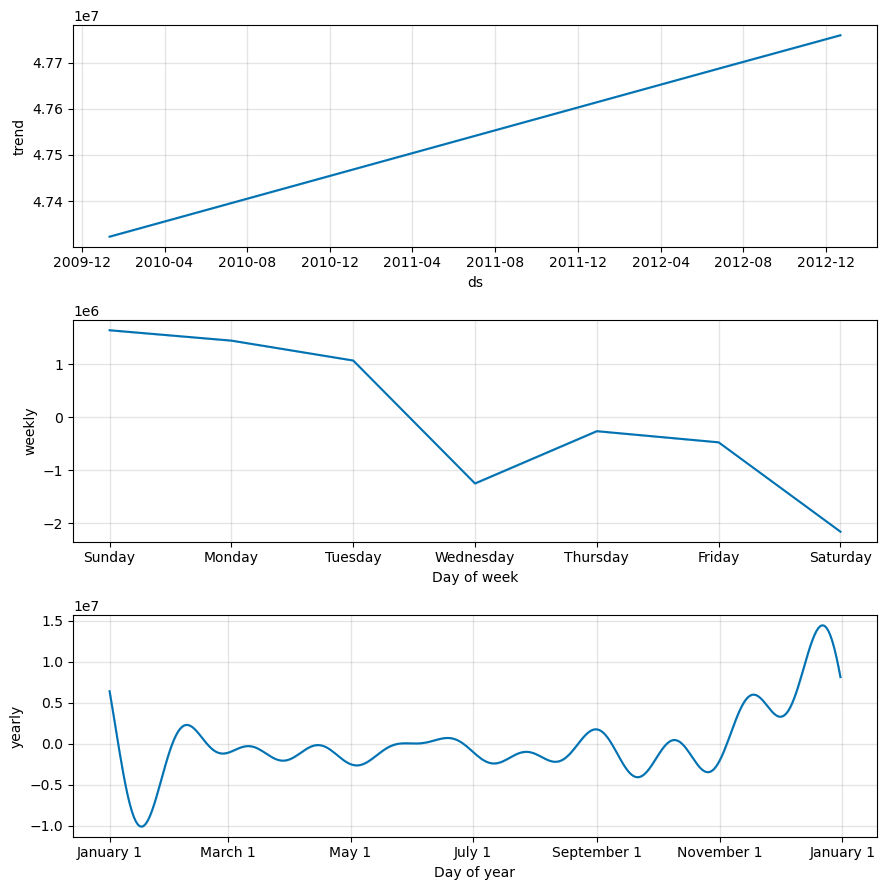

In [80]:
total_sale_forcast_plot1=model.plot_components(forcast)

# as per above grphs we can find that sale is drop in Jan and it's maintain consistently high from mid of Feb and goes till novemenr mid and again at end of november sales will go up as due to public holidays... on Yearly basis...